<a href="https://colab.research.google.com/github/srivastavask/cvlab-ai/blob/main/lab1/B43_E22CSEU1276_AbhayRaj/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import cv2

In [ ]:
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


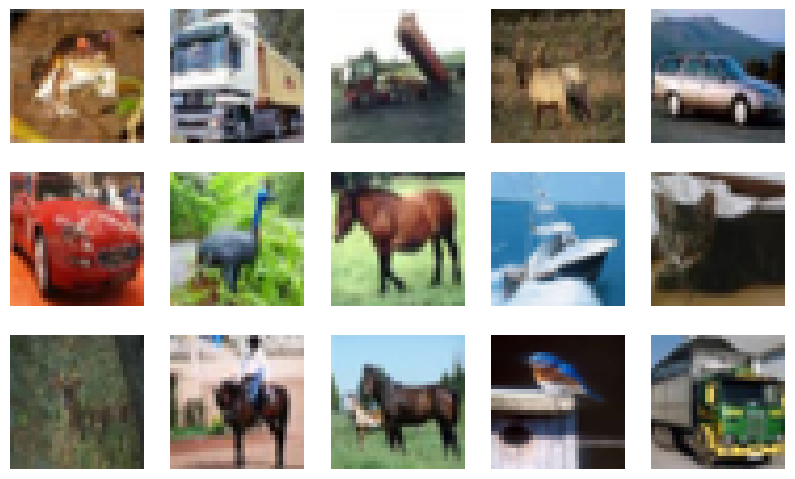

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    ax.axis("off")

plt.show()

In [ ]:
def add_noise_blur(image):
    noise = np.random.normal(loc=0, scale=0.1, size=image.shape)
    noisy_image = np.clip(image + noise, 0, 1)
    blurred_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)
    return blurred_image

deg_x_train = np.array([add_noise_blur(img) for img in x_train])
deg_x_test = np.array([add_noise_blur(img) for img in x_test])

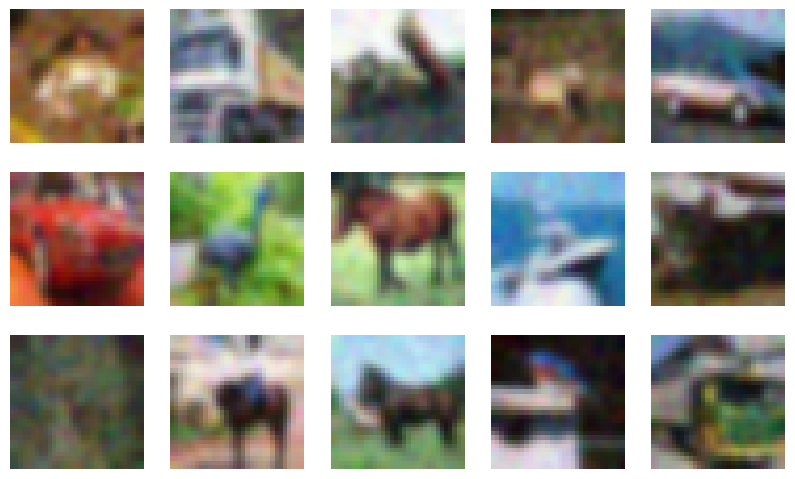

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(deg_x_train[i])
    ax.axis("off")

plt.show()

In [ ]:
def build_autoencoder():
    input_img = Input(shape=(32, 32, 3))

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    return autoencoder


In [ ]:
autoencoder = build_autoencoder()
autoencoder.compile(optimizer=Adam(), loss='mse')

In [ ]:
autoencoder.fit(deg_x_train, x_train, epochs=10, batch_size=128, validation_data=(deg_x_test, x_test))


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - loss: 0.0204 - val_loss: 0.0063
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0060 - val_loss: 0.0054
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0053 - val_loss: 0.0049
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0049 - val_loss: 0.0046
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0047 - val_loss: 0.0048
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0040 - val_loss: 0.0039


In [ ]:
predicted = autoencoder.predict(deg_x_test[:10])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step


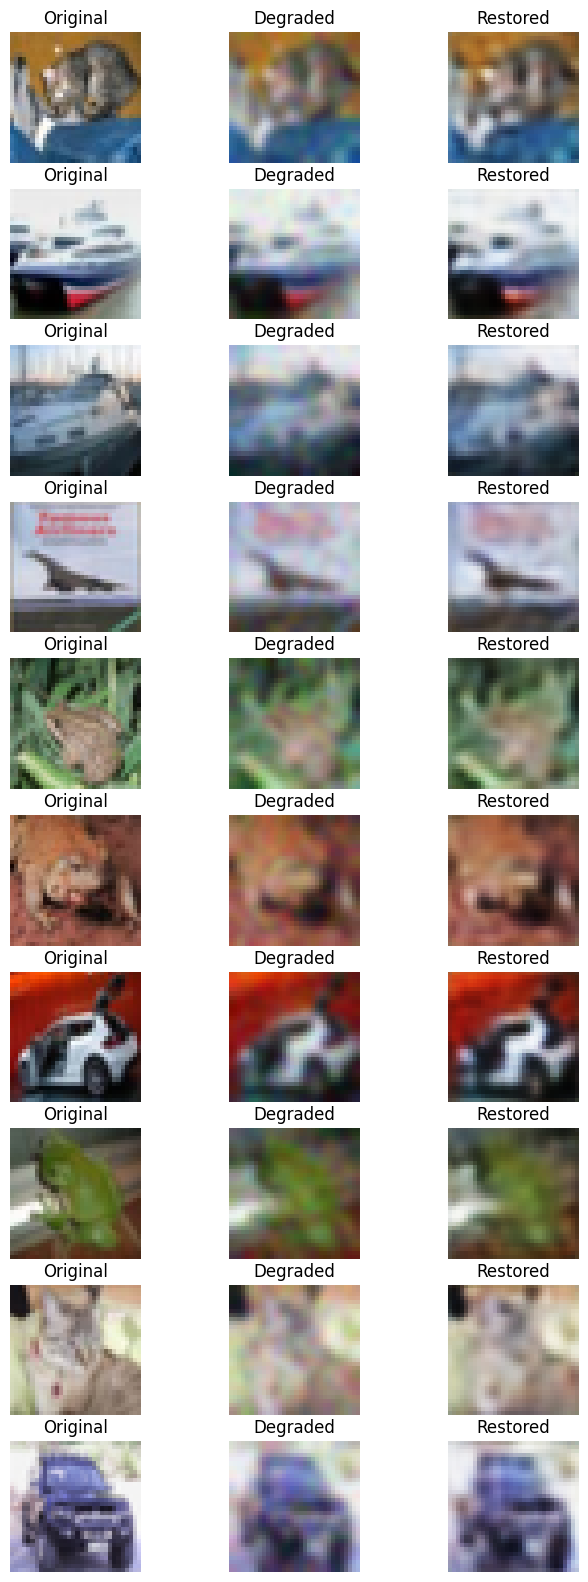

Average PSNR: 24.138238096266416


In [ ]:
fig, axes = plt.subplots(10, 3, figsize=(8, 20))
for i in range(10):
    axes[i, 0].imshow(x_test[i])
    axes[i, 0].set_title("Original")
    axes[i, 1].imshow(deg_x_test[i])
    axes[i, 1].set_title("Degraded")
    axes[i, 2].imshow(predicted[i])
    axes[i, 2].set_title("Restored")

    for j in range(3):
        axes[i, j].axis("off")

plt.show()

# Evaluate using PSNR
def psnr(original, restored):
    mse = np.mean((original - restored) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 1.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

psnr_values = [psnr(x_test[i], predicted[i]) for i in range(10)]
print("Average PSNR:", np.mean(psnr_values))

In [ ]:
img = cv2.imread("test.jpg")


In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized_img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)
img = img / 255.0

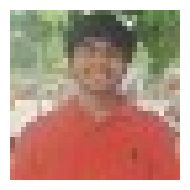

In [ ]:
plt.figure(figsize=(2, 2))
plt.axis("off")
plt.tight_layout()
plt.imshow(resized_img)


In [ ]:
noise = np.random.normal(loc=0, scale=0.1, size=img.shape)
noisy_image = np.clip(img + noise, 0, 1)  # Add noise
blurred_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)  # Apply blur

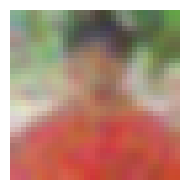

In [ ]:
plt.figure(figsize=(2, 2))
plt.axis("off")
plt.tight_layout()
plt.imshow(blurred_image)

In [ ]:
input = np.expand_dims(blurred_image, axis=0)
restored = autoencoder.predict(input)[0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step


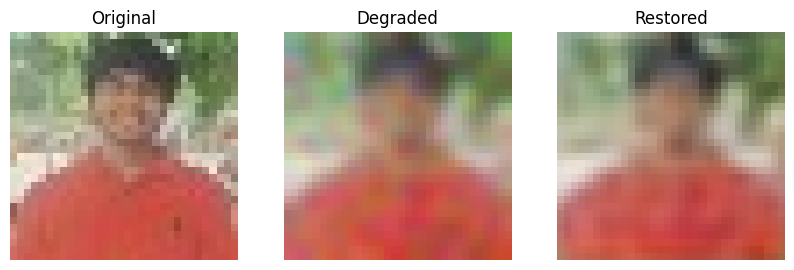

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes[0].imshow(resized_img)
axes[0].set_title("Original")
axes[1].imshow(blurred_image)
axes[1].set_title("Degraded")
axes[2].imshow(restored)
axes[2].set_title("Restored")

for ax in axes:
    ax.axis("off")

plt.show()

Task2 : Classification

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
num_classes = 100

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
def build_alexnet():
    model = Sequential([
        Conv2D(96, (11,11), strides=4, activation='relu', input_shape=(32,32,3), padding='same'),
        MaxPooling2D(pool_size=(2,2), strides=2),

        Conv2D(256, (5,5), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2), strides=2),

        Conv2D(384, (3,3), activation='relu', padding='same'),
        Conv2D(384, (3,3), activation='relu', padding='same'),
        Conv2D(256, (3,3), activation='relu', padding='same'),
        MaxPooling2D(pool_size=(2,2), strides=2),

        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(100, activation='softmax')
    ])

    return model

vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

alexnet_pretrained = build_alexnet()

vgg_conv_layers = [layer for layer in vgg16.layers if 'conv' in layer.name][1:5]  # Skip first layer
alexnet_conv_layers = [layer for layer in alexnet_pretrained.layers if 'conv' in layer.name][1:]  # Skip first layer

# Ensure layer count matches
assert len(vgg_conv_layers) == len(alexnet_conv_layers), "Mismatch in layer count!"

# Transfer Weights for Convolutional Layers (Skipping First Layer)
for vgg_layer, alex_layer in zip(vgg_conv_layers, alexnet_conv_layers):
    if vgg_layer.get_weights()[0].shape == alex_layer.get_weights()[0].shape:  # Check shape compatibility
        alex_layer.set_weights(vgg_layer.get_weights())
        alex_layer.trainable = False  # Freeze them


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(100, activation='softmax')(x)

vgg16 = Model(inputs=base_model.input, outputs=x)

for layer in base_model.layers:
    layer.trainable = False

vgg16.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
alexnet_pretrained.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import time

In [ ]:
def train_and_evaluate(model, name):
    start_time = time.time()
    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))
    end_time = time.time()
    inference_time = end_time - start_time
    print(f"{name} Training Time: {inference_time:.2f} sec")
    return history, inference_time

In [ ]:
history_alexnet, time_alexnet = train_and_evaluate(alexnet_pretrained, "AlexNet")

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.0222 - loss: 4.4395 - val_accuracy: 0.0609 - val_loss: 4.0579
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.0696 - loss: 3.9784 - val_accuracy: 0.1040 - val_loss: 3.7812
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.1127 - loss: 3.7250 - val_accuracy: 0.1494 - val_loss: 3.5329
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.1529 - loss: 3.4753 - val_accuracy: 0.1861 - val_loss: 3.3635
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.1868 - loss: 3.2852 - val_accuracy: 0.2065 - val_loss: 3.2357
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.2218 - loss: 3.1069 - val_accuracy: 0.2255 - val_loss: 3.1579
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.2461 - loss: 2.9593 - val_accuracy: 0.2365 - val_loss: 3.1082
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.2744 - loss: 2.8093 - v

In [ ]:
history_vgg16, time_vgg16 = train_and_evaluate(vgg16, "VGG16")

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.1315 - loss: 3.8322 - val_accuracy: 0.2850 - val_loss: 2.9242
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.2591 - loss: 3.0008 - val_accuracy: 0.3184 - val_loss: 2.7453
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.2943 - loss: 2.8321 - val_accuracy: 0.3282 - val_loss: 2.6715
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.3106 - loss: 2.7222 - val_accuracy: 0.3380 - val_loss: 2.6292
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.3280 - loss: 2.6393 - val_accuracy: 0.3453 - val_loss: 2.5935
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.3410 - loss: 2.5787 - val_accuracy: 0.3490 - val_loss: 2.5740
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.3552 - loss: 2.5130 - val_accuracy: 0.3553 - val_loss: 2.5434
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.3613 - loss: 2.4820 - 

In [ ]:
def plot_history(history, model_name):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()

    plt.show()

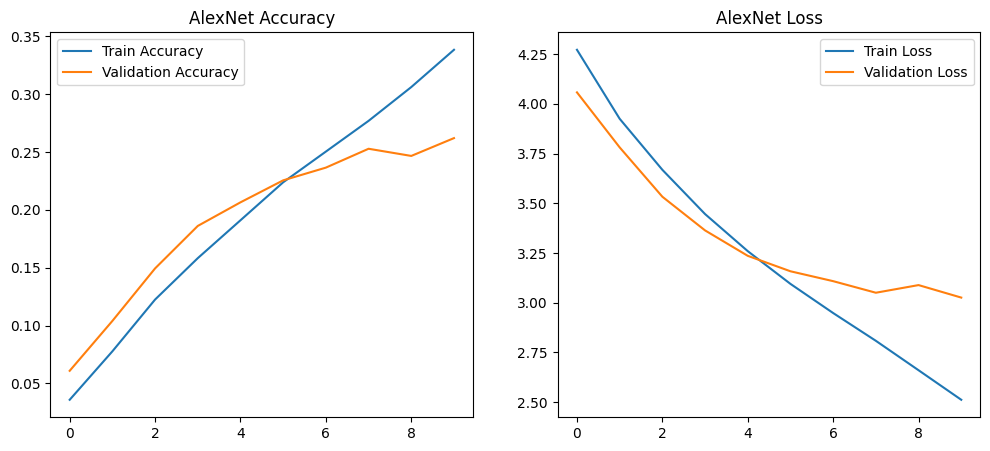

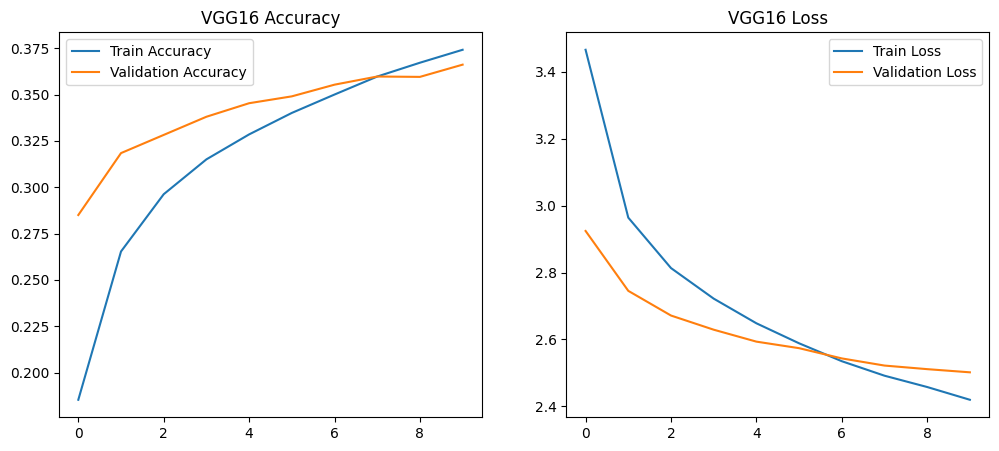

AlexNet Inference Time: 113.23 sec
VGG16 Inference Time: 163.96 sec


In [ ]:
plot_history(history_alexnet, "AlexNet")
plot_history(history_vgg16, "VGG16")

print(f"AlexNet Inference Time: {time_alexnet:.2f} sec")
print(f"VGG16 Inference Time: {time_vgg16:.2f} sec")